In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Parte A

In [2]:
carpeta = 'C:/Users/migue/Documents'
from torchvision import datasets
from torchvision import transforms

#Conjunto de entrenamiento
train_set = datasets.MNIST(carpeta, download=True, train=True)

#Conjunto de test
test_set = datasets.MNIST(carpeta, download=True, train=False)

In [3]:
print(train_set.train_data.shape)
print(test_set.test_data.shape)

torch.max(train_set.train_data)

C:\Users\migue\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


C:\Users\migue\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


torch.Size([10000, 28, 28])


tensor(255, dtype=torch.uint8)

In [4]:
train = train_set.train_data[0:50000,:,:]
validation = train_set.train_data[50000:,:,:]
test = test_set.test_data
print('train: ' + str(train.shape) + '\n'
     'validation: ' + str(validation.shape) + '\n'
     'test: ' + str(test.shape))

#Ahora pasamos las imagenes de matrices de 28x28
# a vectores de 784.

train = train.view(50000,784)
validation = validation.view(10000,784)
test = test.view(10000,784)
print('train: ' + str(train.shape) + '\n'
     'validation: ' + str(validation.shape) + '\n'
     'test: ' + str(test.shape))

train: torch.Size([50000, 28, 28])
validation: torch.Size([10000, 28, 28])
test: torch.Size([10000, 28, 28])
train: torch.Size([50000, 784])
validation: torch.Size([10000, 784])
test: torch.Size([10000, 784])


In [5]:
#Pasamos los datos de (0,255) a (0,1)
train = train.float()/255
validation = validation.float()/255
test = test.float()/255

# Parte B

In [6]:
#Adagrad, RMSProp y Adam

# Parte C

In [7]:
#Creamos la clase
import torch.nn as nn
import torch.nn.functional as F

class RedNeuronal(nn.Module):
    def __init__(self, entrada, salida, capas, dropout=0.0):
        super(RedNeuronal,self).__init__()
        self.fc1 = nn.Linear(entrada,capas[0])
        self.n_capas = len(capas)
        self.isdropout = False
        
        #1 capa
        if self.n_capas == 1:
            self.fc2 = nn.Linear(capas[-1],salida)
            if dropout > 0.0 and dropout < 1.0:
                self.dropout = nn.Dropout(p=dropout)
                self.isdropout = True
        
        #2 capas
        elif self.n_capas == 2:
            self.fc2 = nn.Linear(capas[0],capas[-1])
            self.fc3 = nn.Linear(capas[-1],salida)
        
        #Ninguna de las anteriores
        else:
            raise ValueError("No se puede crear la red con ese número de capas: {}".format(self.n_capas))
            
    def forward(self,x):
        y = F.relu(self.fc1(x))
        if self.n_capas == 1:
            if self.isdropout:
                y = self.fc2(self.dropout(y))
            else: 
                y = self.fc2(y)
        else:
            y = F.relu(self.fc2(y))
            y = self.fc3(y)
        return y
    

# Parte D

In [8]:
import torch.optim as optim
CrossEntropy = nn.CrossEntropyLoss()

#Se cargan los labels 
train_labels = train_set.train_labels[0:50000]
validation_labels = train_set.train_labels[50000:]
test_labels = test_set.test_labels

C:\Users\migue\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\migue\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [9]:
#Se dejan todos los datos guardados en batches
import torch.utils.data as util4data

#train
trainbatches = util4data.DataLoader(train,batch_size=100)
trainlabels = util4data.DataLoader(train_labels,batch_size=100)

list_trainlabels = []
for i,target in enumerate(trainlabels):
    list_trainlabels.append(target)


#test
testbatches = util4data.DataLoader(test,batch_size=100)
testlabels = util4data.DataLoader(test_labels,batch_size=100)

list_testlabels = []
for i,target in enumerate(testlabels):
    list_testlabels.append(target)

#numero de epocas
epocas = 20

## Red con 1 capa

In [10]:
model_1layer = RedNeuronal(784,10,[100])
print(model_1layer)

opt_1layer = optim.Adam(model_1layer.parameters(), lr=0.0002)
losses_1layer = []
val_loss_1layer = []

RedNeuronal(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [11]:
for epoca in range(epocas):
    running_loss = 0.0
    model_1layer.train()
    for i, data in enumerate(trainbatches, 0):
        opt_1layer.zero_grad()
        # forward
        outputs = model_1layer(data)
        # obtener loss
        loss = CrossEntropy(outputs, list_trainlabels[i])
        loss.backward()
        opt_1layer.step()
        #print(loss.item())
        running_loss += loss.item()
        if i % 50 == 49:
            #Se imprime epoca, batch
            #Cada batch son 100 elementos
            #Entonces 50 batches son 5000 elementos
            print('[%d, %5d] loss: %.3f' %
                  (epoca + 1, i + 1, running_loss / 50))
            #running loss es el error promedio en 50 batches
            running_loss = 0.0
        losses_1layer.append(loss.data.numpy())
        
    model_1layer.eval()
    with torch.no_grad():
        val_output = model_1layer(validation)
        val_loss = CrossEntropy(val_output, validation_labels)
        val_loss_1layer.append(val_loss)

    torch.save(model_1layer.state_dict(),carpeta+'/model_1layer.pth')

print('Finished Training')

[1,    50] loss: 2.060
[1,   100] loss: 1.515
[1,   150] loss: 1.116
[1,   200] loss: 0.870
[1,   250] loss: 0.705
[1,   300] loss: 0.609
[1,   350] loss: 0.584
[1,   400] loss: 0.506
[1,   450] loss: 0.479
[1,   500] loss: 0.460
[2,    50] loss: 0.401
[2,   100] loss: 0.404
[2,   150] loss: 0.418
[2,   200] loss: 0.375
[2,   250] loss: 0.366
[2,   300] loss: 0.361
[2,   350] loss: 0.374
[2,   400] loss: 0.353
[2,   450] loss: 0.342
[2,   500] loss: 0.349
[3,    50] loss: 0.303
[3,   100] loss: 0.322
[3,   150] loss: 0.343
[3,   200] loss: 0.302
[3,   250] loss: 0.305
[3,   300] loss: 0.305
[3,   350] loss: 0.317
[3,   400] loss: 0.307
[3,   450] loss: 0.296
[3,   500] loss: 0.306
[4,    50] loss: 0.264
[4,   100] loss: 0.284
[4,   150] loss: 0.305
[4,   200] loss: 0.265
[4,   250] loss: 0.273
[4,   300] loss: 0.272
[4,   350] loss: 0.282
[4,   400] loss: 0.277
[4,   450] loss: 0.267
[4,   500] loss: 0.278
[5,    50] loss: 0.237
[5,   100] loss: 0.256
[5,   150] loss: 0.277
[5,   200] 

In [30]:
print(val_loss_1layer)

[tensor(0.3993), tensor(0.3044), tensor(0.2684), tensor(0.2441), tensor(0.2252), tensor(0.2095), tensor(0.1965), tensor(0.1855), tensor(0.1757), tensor(0.1671), tensor(0.1594), tensor(0.1528), tensor(0.1470), tensor(0.1418), tensor(0.1371), tensor(0.1329), tensor(0.1290), tensor(0.1255), tensor(0.1222), tensor(0.1192)]


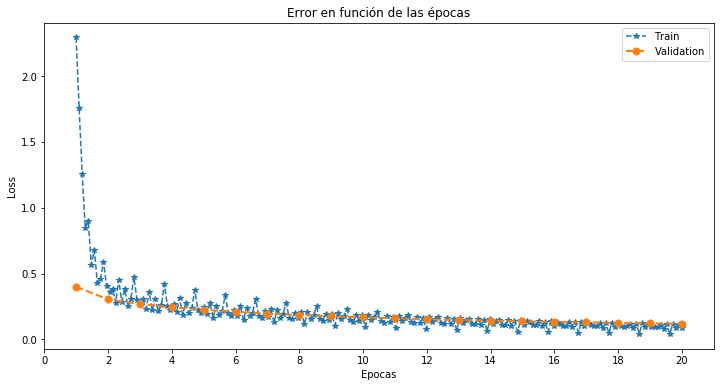

In [12]:
import math
plt.figure(figsize=(12, 6))
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.plot(np.linspace(1, epocas, math.ceil(len(losses_1layer)/50)), losses_1layer[::50],'--*',
        label='Train')
plt.plot(np.linspace(1, epocas, 20), val_loss_1layer,'--o',ms=7,linewidth=2,
         label='Validation')
plt.xticks(np.arange(0, epocas + 1, 2));
plt.xlim(0, epocas + 1)
plt.legend()
plt.title('Error en función de las épocas')
plt.savefig(r'C:\Users\migue\Documents\9no Semestre\Aprendizaje de Máquinas\Tarea 4\1layer.pdf',
           format='pdf',
           bbox_inches='tight')
plt.show()

In [13]:
model_1layer.load_state_dict(torch.load(carpeta+'/model_1layer.pth'))
model_1layer.eval()

correct = 0
total = 0
predicted_matrix = list()
with torch.no_grad():
    for i,data in enumerate(testbatches):
        outputs = model_1layer(data)
        _, predicted = torch.max(outputs.data, 1)
        predicted_matrix.append(predicted)
        total += 1
        correct += (predicted == list_testlabels[i]).sum().item()
        
print('Precisión para el conjunto de test: %.2f %%' % (
    correct / total))

Precisión para el conjunto de test: 96.43 %


In [14]:
from sklearn.metrics import confusion_matrix
labels_real=[0,1,2,3,4,5,6,7,8,9]
list_matrix = []
for i in range(len(predicted_matrix)):
    list_matrix.append(confusion_matrix(list_testlabels[i],predicted_matrix[i],labels_real))

matriz_confusion = sum(list_matrix)
print(matriz_confusion)

for i in range(10):
    print("Precision de %d : %.2f %%" % (i,100*matriz_confusion[i,i]/matriz_confusion[i,:].sum()))


[[ 961    0    3    2    0    4    7    1    2    0]
 [   0 1118    4    0    0    1    5    0    7    0]
 [   4    2 1000    5    5    0    3    5    8    0]
 [   0    0   10  972    0    7    0    6   11    4]
 [   1    0    7    1  954    0    3    3    2   11]
 [   4    1    0   19    3  840   10    1    9    5]
 [   6    3    3    1    6    6  930    0    3    0]
 [   0    6   14    6    0    1    0  989    1   11]
 [   3    1    7   14    7    3    4    7  924    4]
 [   3    6    1   11   16    4    1    9    3  955]]
Precision de 0 : 98.06 %
Precision de 1 : 98.50 %
Precision de 2 : 96.90 %
Precision de 3 : 96.24 %
Precision de 4 : 97.15 %
Precision de 5 : 94.17 %
Precision de 6 : 97.08 %
Precision de 7 : 96.21 %
Precision de 8 : 94.87 %
Precision de 9 : 94.65 %


## Red con 2 capas

In [15]:
model_2layer = RedNeuronal(784,10,[100,100])
print(model_2layer)
opt_2layer = optim.Adam(model_2layer.parameters(), lr=0.0002)
losses_2layer = []
val_loss_2layer = []

RedNeuronal(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [16]:
for epoca in range(epocas):
    running_loss = 0.0
    model_2layer.train()
    for i, data in enumerate(trainbatches, 0):
        opt_2layer.zero_grad()
        # forward
        outputs = model_2layer(data)
        # obtener loss
        loss = CrossEntropy(outputs, list_trainlabels[i])
        loss.backward()
        opt_2layer.step()
        running_loss += loss.item()
        if i % 50 == 49:
            print('[%d, %5d] loss: %.3f' %
                  (epoca + 1, i + 1, running_loss / 50))
            running_loss = 0.0
        losses_2layer.append(loss.data.numpy())
    model_1layer.eval()
    with torch.no_grad():
        val_output = model_2layer(validation)
        val_loss = CrossEntropy(val_output, validation_labels)
        val_loss_2layer.append(val_loss)
    torch.save(model_2layer.state_dict(),carpeta+'/model_2layer.pth')
        
print('Finished Training')

[1,    50] loss: 2.194
[1,   100] loss: 1.708
[1,   150] loss: 1.102
[1,   200] loss: 0.760
[1,   250] loss: 0.588
[1,   300] loss: 0.509
[1,   350] loss: 0.492
[1,   400] loss: 0.431
[1,   450] loss: 0.408
[1,   500] loss: 0.399
[2,    50] loss: 0.341
[2,   100] loss: 0.354
[2,   150] loss: 0.372
[2,   200] loss: 0.326
[2,   250] loss: 0.319
[2,   300] loss: 0.318
[2,   350] loss: 0.326
[2,   400] loss: 0.313
[2,   450] loss: 0.300
[2,   500] loss: 0.308
[3,    50] loss: 0.261
[3,   100] loss: 0.283
[3,   150] loss: 0.304
[3,   200] loss: 0.262
[3,   250] loss: 0.266
[3,   300] loss: 0.266
[3,   350] loss: 0.272
[3,   400] loss: 0.267
[3,   450] loss: 0.257
[3,   500] loss: 0.266
[4,    50] loss: 0.222
[4,   100] loss: 0.246
[4,   150] loss: 0.264
[4,   200] loss: 0.226
[4,   250] loss: 0.234
[4,   300] loss: 0.233
[4,   350] loss: 0.239
[4,   400] loss: 0.236
[4,   450] loss: 0.229
[4,   500] loss: 0.238
[5,    50] loss: 0.195
[5,   100] loss: 0.220
[5,   150] loss: 0.234
[5,   200] 

In [31]:
print(val_loss_2layer)

[tensor(0.3411), tensor(0.2640), tensor(0.2289), tensor(0.2058), tensor(0.1883), tensor(0.1740), tensor(0.1624), tensor(0.1525), tensor(0.1443), tensor(0.1372), tensor(0.1311), tensor(0.1255), tensor(0.1208), tensor(0.1166), tensor(0.1129), tensor(0.1094), tensor(0.1068), tensor(0.1045), tensor(0.1026), tensor(0.1009)]


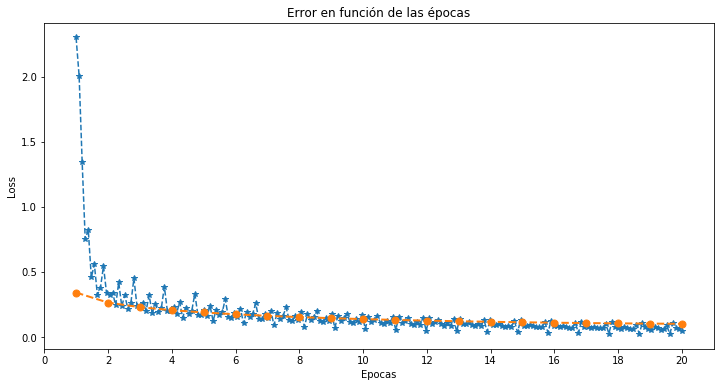

In [17]:
plt.figure(figsize=(12, 6))
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.plot(np.linspace(1, epocas, math.ceil(len(losses_2layer)/50)), losses_2layer[::50],'--*',
         label='Train')
plt.plot(np.linspace(1, epocas, 20), val_loss_2layer,'--o',ms=7,linewidth=2,
         label='Validation')
plt.savefig(r'C:\Users\migue\Documents\9no Semestre\Aprendizaje de Máquinas\Tarea 4\2layer.pdf',
           format='pdf',
           bbox_inches='tight')
plt.xticks(np.arange(0, epocas + 1, 2));
plt.xlim(0, epocas + 1)
plt.title('Error en función de las épocas')
plt.show()

In [18]:
model_2layer.load_state_dict(torch.load(carpeta+'/model_2layer.pth'))
model_2layer.eval()

correct = 0
total = 0
predicted_matrix = list()
with torch.no_grad():
    for i,data in enumerate(testbatches):
        outputs = model_2layer(data)
        _, predicted = torch.max(outputs.data, 1)
        predicted_matrix.append(predicted)
        total += 1
        correct += (predicted == list_testlabels[i]).sum().item()
        
print('Precisión para el conjunto de test: %.2f %%' % (
    correct / total))

Precisión para el conjunto de test: 97.12 %


In [19]:
list_matrix = []
for i in range(len(predicted_matrix)):
    list_matrix.append(confusion_matrix(list_testlabels[i],predicted_matrix[i],labels_real))

matriz_confusion = sum(list_matrix)
print(matriz_confusion)

for i in range(10):
    print("Precision de %d : %.2f %%" % (i,100*matriz_confusion[i,i]/matriz_confusion[i,:].sum()))
    

[[ 962    0    2    2    0    2    9    1    2    0]
 [   0 1119    4    0    0    1    4    0    7    0]
 [   3    1 1008    4    0    0    5    5    6    0]
 [   0    0    8  991    0    1    0    5    5    0]
 [   2    0    6    0  952    1    5    2    2   12]
 [   2    1    1   13    2  858    7    0    6    2]
 [   5    3    2    1    3    2  941    0    1    0]
 [   0    5   13    7    0    1    0  991    3    8]
 [   3    0    7   11    3    6    6    4  932    2]
 [   3    5    1   13   15    4    1    7    2  958]]
Precision de 0 : 98.16 %
Precision de 1 : 98.59 %
Precision de 2 : 97.67 %
Precision de 3 : 98.12 %
Precision de 4 : 96.95 %
Precision de 5 : 96.19 %
Precision de 6 : 98.23 %
Precision de 7 : 96.40 %
Precision de 8 : 95.69 %
Precision de 9 : 94.95 %


## Red de 1 capa con regularizacion L2

In [20]:
model_L2reg = RedNeuronal(784,10,[100])
print(model_L2reg)
opt_reg = optim.Adam(model_L2reg.parameters(), lr=0.0002,weight_decay=1e-5)
losses_reg = []
val_loss_reg = []

RedNeuronal(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [21]:
for epoca in range(epocas):
    running_loss = 0.0
    model_L2reg.train()
    for i, data in enumerate(trainbatches, 0):
        opt_reg.zero_grad()
        # forward
        outputs = model_L2reg(data)
        # obtener loss
        loss = CrossEntropy(outputs, list_trainlabels[i])
        loss.backward()
        opt_reg.step()
        running_loss += loss.item()
        if i % 50 == 49:
            print('[%d, %5d] loss: %.3f' %
                  (epoca + 1, i + 1, running_loss / 50))
            running_loss = 0.0
        losses_reg.append(loss.data.numpy())
        
    model_L2reg.eval()
    with torch.no_grad():
        val_output = model_L2reg(validation)
        val_loss = CrossEntropy(val_output, validation_labels)
        val_loss_reg.append(val_loss)
    torch.save(model_L2reg.state_dict(),carpeta+'/model_L2reg.pth')
        
print('Finished Training')

[1,    50] loss: 2.101
[1,   100] loss: 1.597
[1,   150] loss: 1.176
[1,   200] loss: 0.898
[1,   250] loss: 0.717
[1,   300] loss: 0.611
[1,   350] loss: 0.586
[1,   400] loss: 0.505
[1,   450] loss: 0.479
[1,   500] loss: 0.461
[2,    50] loss: 0.399
[2,   100] loss: 0.402
[2,   150] loss: 0.417
[2,   200] loss: 0.373
[2,   250] loss: 0.364
[2,   300] loss: 0.358
[2,   350] loss: 0.372
[2,   400] loss: 0.349
[2,   450] loss: 0.343
[2,   500] loss: 0.349
[3,    50] loss: 0.303
[3,   100] loss: 0.320
[3,   150] loss: 0.343
[3,   200] loss: 0.301
[3,   250] loss: 0.302
[3,   300] loss: 0.302
[3,   350] loss: 0.314
[3,   400] loss: 0.302
[3,   450] loss: 0.297
[3,   500] loss: 0.306
[4,    50] loss: 0.263
[4,   100] loss: 0.283
[4,   150] loss: 0.305
[4,   200] loss: 0.264
[4,   250] loss: 0.270
[4,   300] loss: 0.271
[4,   350] loss: 0.279
[4,   400] loss: 0.272
[4,   450] loss: 0.268
[4,   500] loss: 0.278
[5,    50] loss: 0.237
[5,   100] loss: 0.256
[5,   150] loss: 0.277
[5,   200] 

In [32]:
print(val_loss_reg)

[tensor(0.3966), tensor(0.3018), tensor(0.2657), tensor(0.2421), tensor(0.2232), tensor(0.2076), tensor(0.1947), tensor(0.1836), tensor(0.1738), tensor(0.1653), tensor(0.1577), tensor(0.1511), tensor(0.1451), tensor(0.1397), tensor(0.1348), tensor(0.1304), tensor(0.1265), tensor(0.1227), tensor(0.1194), tensor(0.1164)]


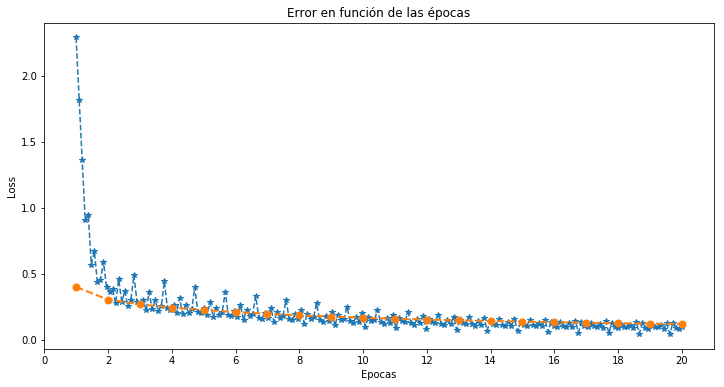

In [22]:
plt.figure(figsize=(12, 6))
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.plot(np.linspace(1, epocas, math.ceil(len(losses_reg)/50)), losses_reg[::50],'--*',
        label='Train')
plt.plot(np.linspace(1, epocas, 20), val_loss_1layer,'--o',ms=7,linewidth=2,
         label='Validation')
plt.xticks(np.arange(0, epocas + 1, 2));
plt.xlim(0, epocas + 1)
plt.title('Error en función de las épocas')
plt.savefig(r'C:\Users\migue\Documents\9no Semestre\Aprendizaje de Máquinas\Tarea 4\reglayer.pdf',
           format='pdf',
           bbox_inches='tight')
plt.show()

In [23]:
model_L2reg.load_state_dict(torch.load(carpeta+'/model_L2reg.pth'))
model_L2reg.eval()

correct = 0
total = 0
predicted_matrix = list()
with torch.no_grad():
    for i,data in enumerate(testbatches):
        outputs = model_L2reg(data)
        _, predicted = torch.max(outputs.data, 1)
        predicted_matrix.append(predicted)
        total += 1
        correct += (predicted == list_testlabels[i]).sum().item()
        
print('Precisión para el conjunto de test: %.2f %%' % (
    correct / total))

Precisión para el conjunto de test: 96.54 %


In [24]:
list_matrix = []
for i in range(len(predicted_matrix)):
    list_matrix.append(confusion_matrix(list_testlabels[i],predicted_matrix[i],labels_real))

matriz_confusion = sum(list_matrix)
print(matriz_confusion)



for i in range(10):
    print("Precision de %d : %.2f %%" % (i,100*matriz_confusion[i,i]/matriz_confusion[i,:].sum()))


[[ 965    0    2    1    0    2    7    1    2    0]
 [   0 1121    4    0    0    1    4    0    5    0]
 [   5    1 1001    4    0    1    6    7    7    0]
 [   0    0    8  981    0    3    1   10    5    2]
 [   0    1    7    0  951    0    8    2    3   10]
 [   3    2    1   19    2  841    9    2    9    4]
 [   4    3    4    0    5    5  934    0    3    0]
 [   0    6   14    7    0    1    0  991    0    9]
 [   3    3    5   17    7    7    5    7  917    3]
 [   5    6    2   13   18    2    0    9    2  952]]
Precision de 0 : 98.47 %
Precision de 1 : 98.77 %
Precision de 2 : 97.00 %
Precision de 3 : 97.13 %
Precision de 4 : 96.84 %
Precision de 5 : 94.28 %
Precision de 6 : 97.49 %
Precision de 7 : 96.40 %
Precision de 8 : 94.15 %
Precision de 9 : 94.35 %


## Red de 1 capa con dropout 

In [25]:
model_dropout = RedNeuronal(784,10,[100], 0.5)
print(model_dropout)
opt_dropout = optim.Adam(model_dropout.parameters(), lr=0.0002)
losses_dropout = []
val_loss_dropout = []

RedNeuronal(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)


In [26]:
for epoca in range(epocas):
    running_loss = 0.0
    model_dropout.train()
    for i, data in enumerate(trainbatches, 0):
        opt_dropout.zero_grad()
        # forward
        outputs = model_dropout(data)
        # obtener loss
        loss = CrossEntropy(outputs, list_trainlabels[i])
        loss.backward()
        opt_dropout.step()
        #print(loss.item())
        running_loss += loss.item()
        if i % 50 == 49:
            print('[%d, %5d] loss: %.3f' %
                  (epoca + 1, i + 1, running_loss / 50))
            running_loss = 0.0
        losses_dropout.append(loss.data.numpy())
    model_dropout.eval()
    with torch.no_grad():
        val_output = model_dropout(validation)
        val_loss = CrossEntropy(val_output, validation_labels)
        val_loss_dropout.append(val_loss)
    torch.save(model_dropout.state_dict(),carpeta+'/model_dropout.pth')
        
print('Finished Training')

[1,    50] loss: 2.148
[1,   100] loss: 1.717
[1,   150] loss: 1.346
[1,   200] loss: 1.106
[1,   250] loss: 0.942
[1,   300] loss: 0.829
[1,   350] loss: 0.803
[1,   400] loss: 0.714
[1,   450] loss: 0.673
[1,   500] loss: 0.647
[2,    50] loss: 0.574
[2,   100] loss: 0.561
[2,   150] loss: 0.588
[2,   200] loss: 0.538
[2,   250] loss: 0.525
[2,   300] loss: 0.512
[2,   350] loss: 0.529
[2,   400] loss: 0.494
[2,   450] loss: 0.488
[2,   500] loss: 0.497
[3,    50] loss: 0.436
[3,   100] loss: 0.445
[3,   150] loss: 0.462
[3,   200] loss: 0.432
[3,   250] loss: 0.432
[3,   300] loss: 0.416
[3,   350] loss: 0.450
[3,   400] loss: 0.427
[3,   450] loss: 0.418
[3,   500] loss: 0.428
[4,    50] loss: 0.368
[4,   100] loss: 0.390
[4,   150] loss: 0.418
[4,   200] loss: 0.384
[4,   250] loss: 0.380
[4,   300] loss: 0.385
[4,   350] loss: 0.393
[4,   400] loss: 0.380
[4,   450] loss: 0.382
[4,   500] loss: 0.388
[5,    50] loss: 0.340
[5,   100] loss: 0.350
[5,   150] loss: 0.375
[5,   200] 

In [33]:
print(val_loss_dropout)

[tensor(0.4672), tensor(0.3383), tensor(0.2893), tensor(0.2608), tensor(0.2401), tensor(0.2221), tensor(0.2088), tensor(0.1973), tensor(0.1869), tensor(0.1784), tensor(0.1717), tensor(0.1644), tensor(0.1590), tensor(0.1538), tensor(0.1489), tensor(0.1450), tensor(0.1410), tensor(0.1373), tensor(0.1340), tensor(0.1306)]


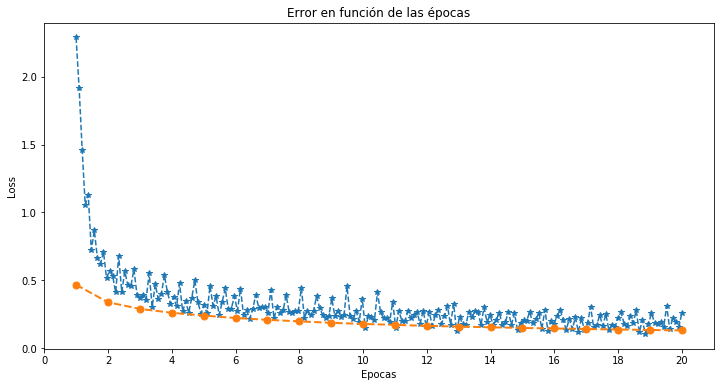

In [27]:
plt.figure(figsize=(12, 6))
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.plot(np.linspace(1, epocas, math.ceil(len(losses_dropout)/50)), losses_dropout[::50],'--*',
        label='Train')
plt.plot(np.linspace(1, epocas, 20), val_loss_dropout,'--o',ms=7,linewidth=2,
         label='Validation')
plt.xticks(np.arange(0, epocas + 1, 2));
plt.xlim(0, epocas + 1)
plt.title('Error en función de las épocas')
plt.savefig(r'C:\Users\migue\Documents\9no Semestre\Aprendizaje de Máquinas\Tarea 4\dropoutlayer.pdf',
           format='pdf',
           bbox_inches='tight')
plt.show()

In [28]:
model_dropout.load_state_dict(torch.load(carpeta+'/model_dropout.pth'))
model_dropout.eval()

correct = 0
total = 0
predicted_matrix = list()
with torch.no_grad():
    for i,data in enumerate(testbatches):
        outputs = model_dropout(data)
        _, predicted = torch.max(outputs.data, 1)
        predicted_matrix.append(predicted)
        total += 1
        correct += (predicted == list_testlabels[i]).sum().item()
        
print('Precisión para el conjunto de test: %.2f %%' % (
    correct / total))

Precisión para el conjunto de test: 96.13 %


In [29]:
list_matrix = []
for i in range(len(predicted_matrix)):
    list_matrix.append(confusion_matrix(list_testlabels[i],predicted_matrix[i],labels_real))

matriz_confusion = sum(list_matrix)
print(matriz_confusion)

for i in range(10):
    print("Precision de %d : %.2f %%" % (i,100*matriz_confusion[i,i]/matriz_confusion[i,:].sum()))


[[ 967    0    1    2    0    3    5    1    1    0]
 [   0 1123    2    2    0    1    3    1    3    0]
 [   4    1  989    6    7    1    4    8   12    0]
 [   0    1    8  975    1    5    0   11    9    0]
 [   1    0    4    0  952    0    8    1    3   13]
 [   5    1    1   24    3  827   10    3   11    7]
 [   8    3    1    1    7    5  929    0    4    0]
 [   2    7   17    7    2    0    0  983    0   10]
 [   5    4    5   11    6    6    7    8  918    4]
 [   5    6    1   11   16    5    0   10    5  950]]
Precision de 0 : 98.67 %
Precision de 1 : 98.94 %
Precision de 2 : 95.83 %
Precision de 3 : 96.53 %
Precision de 4 : 96.95 %
Precision de 5 : 92.71 %
Precision de 6 : 96.97 %
Precision de 7 : 95.62 %
Precision de 8 : 94.25 %
Precision de 9 : 94.15 %
